In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.cross_validation import train_test_split,KFold
import numpy as np


c:\program files\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
datafile_train=r'C:\Users\id832393\Documents\Personal\Data science\Python\Projects\Project1\Data\Consumer_Complaints_train.csv'
datafile_test=r'C:\Users\id832393\Documents\Personal\Data science\Python\Projects\Project1\Data\Consumer_Complaints_test_share.csv'
cd_train=pd.read_csv(datafile_train)
cd_test=pd.read_csv(datafile_test)

print(cd_train.shape)
print(cd_test.shape)

In [5]:
print(cd_train.shape)
print(cd_test.shape)

(478421, 18)
(119606, 17)


In [44]:
list(zip(cd_train.columns,cd_train.dtypes ,cd_train.nunique()))

[('Date received', dtype('O'), 1759),
 ('Product', dtype('O'), 12),
 ('Sub-product', dtype('O'), 47),
 ('Issue', dtype('O'), 95),
 ('Sub-issue', dtype('O'), 68),
 ('Consumer complaint narrative', dtype('O'), 74019),
 ('Company public response', dtype('O'), 10),
 ('Company', dtype('O'), 3276),
 ('State', dtype('O'), 62),
 ('ZIP code', dtype('O'), 25962),
 ('Tags', dtype('O'), 3),
 ('Consumer consent provided?', dtype('O'), 4),
 ('Submitted via', dtype('O'), 6),
 ('Date sent to company', dtype('O'), 1706),
 ('Company response to consumer', dtype('O'), 7),
 ('Timely response?', dtype('O'), 2),
 ('Consumer disputed?', dtype('O'), 2),
 ('Complaint ID', dtype('int64'), 478421),
 ('Date_received_dt', dtype('<M8[ns]'), 1759),
 ('Date_received_dt1', dtype('<M8[ns]'), 1759)]

In [12]:
cd_train

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572
5,2014-06-26,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,WI,54313,NaN,NaN,Referral,2014-07-01,Closed with explanation,Yes,No,913769
6,2012-09-28,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Ocwen,FL,33168,NaN,NaN,Referral,2012-10-01,Closed with explanation,Yes,No,163903
7,2015-05-06,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,I have a mortgage with Quicken Loans. From XXX...,NaN,Quicken Loans,GA,300XX,NaN,Consent provided,Web,2015-05-06,Closed with explanation,Yes,Yes,1362945
8,2013-02-25,Credit card,NaN,Credit card protection / Debt protection,NaN,NaN,NaN,Discover,OH,45640,NaN,NaN,Web,2013-02-26,Closed with monetary relief,Yes,No,331502
9,2016-03-30,Bank account or service,Checking account,Deposits and withdrawals,NaN,I put my settlement check in to bank of americ...,Company has responded to the consumer and the ...,Bank of America,TX,787XX,NaN,Consent provided,Web,2016-04-01,Closed with explanation,Yes,No,1855737


In [ ]:
[('Date received', dtype('O'), 1759),
 ('Product', dtype('O'), 12),
 ('Sub-product', dtype('O'), 47),
 ('Issue', dtype('O'), 95),
 ('Sub-issue', dtype('O'), 68),
 ('Consumer complaint narrative', dtype('O'), 74019),
 ('Company public response', dtype('O'), 10),
 ('Company', dtype('O'), 3276),
 ('State', dtype('O'), 62),
 ('ZIP code', dtype('O'), 25962),
 ('Tags', dtype('O'), 3),
 ('Consumer consent provided?', dtype('O'), 4),
 ('Submitted via', dtype('O'), 6),
 ('Date sent to company', dtype('O'), 1706),
 ('Company response to consumer', dtype('O'), 7),
 ('Timely response?', dtype('O'), 2),
 ('Consumer disputed?', dtype('O'), 2),
 ('Complaint ID', dtype('int64'), 478421),
 ('Date_received_dt', dtype('<M8[ns]'), 1759)]

In [43]:
cd_train['Date_received_dt1']=pd.to_datetime(cd_train['Date received'])

In [46]:
Date_received_month = pd.DataFrame(cd_train['Date_received_dt1'])

In [48]:
Date_received_month.datetime.

,Date_received_dt1
0,2014-05-15
1,2014-09-18
2,2014-03-13
3,2015-07-17
4,2014-11-20
5,2014-06-26
6,2012-09-28
7,2015-05-06
8,2013-02-25
9,2016-03-30


#### junk starts

In [34]:
cd_train.dtypes

Date received                           object
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Date_received_dt                datetime64[ns]
dtype: object

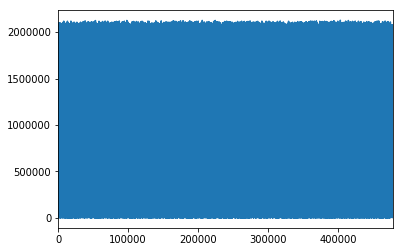

In [36]:
%matplotlib inline
cd_train['Complaint ID'].plot()

#### junk ends

In [16]:
cd_train['Date_received_dt'] = pd.to_datetime(cd_train['Date received'])

In [31]:
for i in (cd_train,):
    i['Date_received_month'] = i('Date received').dt.month


TypeError: 'DataFrame' object is not callable

In [24]:
cd_train.dtypes

Date received                           object
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Date_received_dt                datetime64[ns]
dtype: object

In [3]:
#add response column in test data frame
cd_test['Consumer disputed?']=np.nan

In [3]:
#convert the columns into date time
for col in ['Date received','Date sent to company']:
    cd_train[col]=pd.to_datetime(cd_train[col],infer_datetime_format=True)
    cd_test[col]=pd.to_datetime(cd_test[col],infer_datetime_format=True)

In [4]:
#add new column day difference, derived from available columns
cd_train['day_diff']=pd.to_numeric(cd_train['Date sent to company']-cd_train['Date received'])
cd_test['day_diff']=pd.to_numeric(cd_test['Date sent to company']-cd_test['Date received'])

In [5]:
for col in ['Date received','Date sent to company']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [6]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Consumer complaint narrative : 74019
Company public response : 10
Company : 3276
State : 62
ZIP code : 25962
Tags : 3
Consumer consent provided? : 4
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [7]:
print(cd_train.shape)
print(cd_test.shape)
#print(cd_all.shape)

(478421, 17)
(119606, 16)


In [28]:
cd_test.shape

(119606, 56)

In [ ]:
cd_train.isnull().sum()

In [ ]:
cd_train['Consumer consent provided?'].unique()

In [ ]:
Sub-product                     138473
Sub-issue                       292625
Consumer complaint narrative    403327
Company public response         388029
State                             3839
ZIP code                          3848
Tags                            411215
Consumer consent provided?      342934

len(pd.isnull(cd_train['Tags']))
#len(cd_train)

In [8]:
for col in ['Sub-product','Sub-issue','Consumer complaint narrative',
            'Company public response','Tags','Consumer consent provided?']:
    varname=col.replace('-','_').replace('?','').replace(" ",'_')+'_isNan'
    cd_train[varname]=np.where(pd.isnull(cd_train[col]),1,0)
    cd_train.drop([col],1,inplace=True)
    cd_test[varname]=np.where(pd.isnull(cd_test[col]),1,0)
    cd_test.drop([col],1,inplace=True)
    

In [ ]:
cd_train.head(4)

In [ ]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

In [9]:
for col in ['ZIP code','Company']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [10]:
cd_train['Consumer disputed?']=np.where(cd_train['Consumer disputed?']=="Yes",1,0)

In [11]:
k=cd_train['Issue'].value_counts()

In [ ]:
k

In [12]:
for val in k.axes[0][0:10]:
    varname='Issue_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['Issue']==val,1,0)
    cd_test[varname]=np.where(cd_test['Issue']==val,1,0)
del cd_train['Issue']
del cd_test['Issue']

In [ ]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

In [13]:
k=cd_train['State'].value_counts()

In [14]:
for val in k.axes[0][0:15]:
    varname='State_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['State']==val,1,0)
    cd_test[varname]=np.where(cd_test['State']==val,1,0)
del cd_train['State']
del cd_test['State']

In [15]:
for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp=pd.get_dummies(cd_train[col],prefix=col,drop_first=True)
    cd_train=pd.concat([temp,cd_train],1)
    cd_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cd_test[col],prefix=col,drop_first=True)
    cd_test=pd.concat([temp,cd_test],1)
    cd_test.drop([col],1,inplace=True)

In [16]:
x=cd_train.drop(['Consumer disputed?','Complaint ID'],1)
y=cd_train['Consumer disputed?']

cd_test['Consumer disputed?'].value_counts()

In [17]:
y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         1
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        1
24        0
25        0
26        1
27        0
28        0
29        0
         ..
478391    0
478392    0
478393    0
478394    0
478395    1
478396    0
478397    0
478398    1
478399    1
478400    0
478401    0
478402    0
478403    0
478404    0
478405    0
478406    0
478407    0
478408    0
478409    0
478410    0
478411    0
478412    1
478413    1
478414    0
478415    0
478416    0
478417    0
478418    0
478419    0
478420    0
Name: Consumer disputed?, Length: 478421, dtype: int32

In [ ]:
#cd_test.isnull().sum()

#remove data column from train and test dataframe
del cd_train['data']
del cd_test['data']

### Use RamdomizedSearchCV model

In [19]:
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [20]:
clf = RandomForestClassifier()

param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

n_iter_search = 10

In [21]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search,scoring='roc_auc',cv=5)

In [23]:
random_search.fit(x, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [5, 10, 20, 25, 30, 35], 'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',

In [24]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
##Report function
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [26]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.621 (std: 0.00236)
Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 20, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.621 (std: 0.00175)
Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 20, 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.619 (std: 0.00248)
Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 20, 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.615 (std: 0.00281)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 30, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': Fa

In [28]:
new_rf = RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

In [29]:
new_rf.fit(x,y)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 16.6min finished


RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

In [30]:
prediction=np.where(new_rf.predict(cd_test.drop(['Complaint ID'],1))==1,"Yes","No")
submission=pd.DataFrame(list(zip(cd_test['Complaint ID'],list(prediction))),
                       columns=['Complaint ID','Consumer disputed?'])

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.0s finished


In [31]:
submission.to_csv('sample_submission_1308_02.csv',index=False)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
params={'class_weight':['balanced',None],
 'penalty':['l1','l2'],
 'C':np.linspace(0.01,50,10)}

In [17]:
clf=LogisticRegression()

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_search=GridSearchCV(clf,param_grid=params,cv=5,scoring="roc_auc")

In [20]:
x.shape

(478421, 54)

In [21]:
grid_search.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'class_weight': ['balanced', None], 'penalty': ['l1', 'l2'], 'C': array([  1.00000e-02,   5.56444e+00,   1.11189e+01,   1.66733e+01,
         2.22278e+01,   2.77822e+01,   3.33367e+01,   3.88911e+01,
         4.44456e+01,   5.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [22]:
grid_search.best_estimator_

LogisticRegression(C=5.5644444444444447, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
logr=grid_search.best_estimator_

In [24]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [25]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.611 (std: 0.001)
Parameters: {'C': 5.5644444444444447, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.611 (std: 0.001)
Parameters: {'C': 27.782222222222227, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.611 (std: 0.001)
Parameters: {'C': 16.673333333333336, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 4
Mean validation score: 0.611 (std: 0.001)
Parameters: {'C': 33.336666666666666, 'class_weight': None, 'penalty': 'l2'}

Model with rank: 5
Mean validation score: 0.611 (std: 0.001)
Parameters: {'C': 11.11888888888889, 'class_weight': None, 'penalty': 'l2'}



In [26]:
logr.fit(x,y)

LogisticRegression(C=5.5644444444444447, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [27]:
logr

LogisticRegression(C=5.5644444444444447, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [33]:
cd_test.shape

(119606, 56)

In [34]:
x.shape

(478421, 54)

In [31]:
test_score = logr.predict_proba(cd_test)[:,1]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
clf.fit(x,y)

In [ ]:
prediction=np.where(clf.predict(cd_test.drop(['Complaint ID'],1))==1,"Yes","No")
submission=pd.DataFrame(list(zip(cd_test['Complaint ID'],list(prediction))),
                       columns=['Complaint ID','Consumer disputed?'])

In [ ]:
submission.head(4)

In [ ]:
submission.to_csv('sample_submission.csv',index=False)

This submission will get you auc score of approx 0.50, slightly less than whats required for passing the course. You'll have to make changes 